<a href="https://colab.research.google.com/github/peeb111/Visi-Komputer_TI-2A/blob/main/Jobsheet_2_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

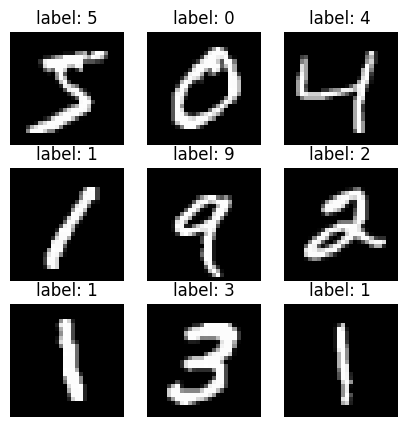

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

Tugas Kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?



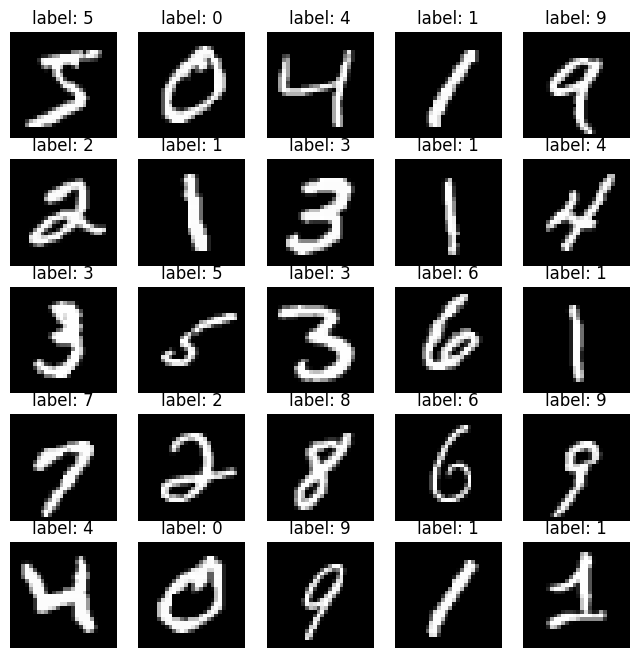

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap akurasi?

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum D3 – Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8990 - loss: 0.3482 - val_accuracy: 0.9792 - val_loss: 0.0727
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9825 - val_loss: 0.0591
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9882 - loss: 0.0391 - val_accuracy: 0.9835 - val_loss: 0.0587
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9857 - val_loss: 0.0583
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9950 - loss: 0.0167 - val_accuracy: 0.9872 - val_loss: 0.0478


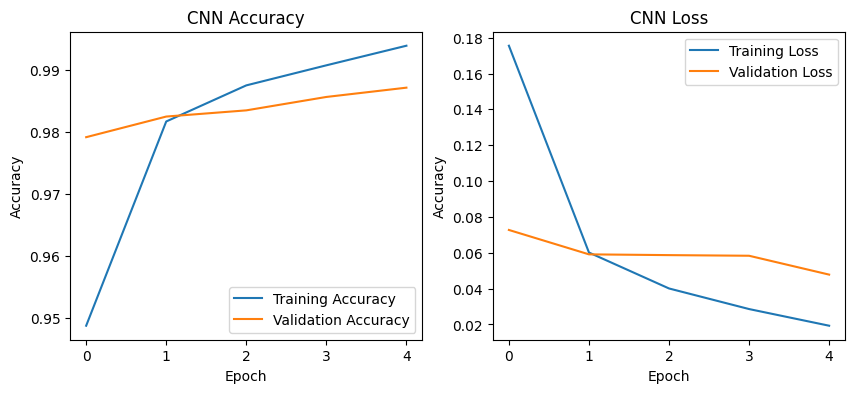

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnm = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnm = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnm, y_train, epochs=5, validation_split=0.1)

# === Plot History ===

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.9143 - loss: 0.2763 - val_accuracy: 0.9850 - val_loss: 0.0532
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9857 - val_loss: 0.0530
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9910 - val_loss: 0.0342
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9907 - val_loss: 0.0394


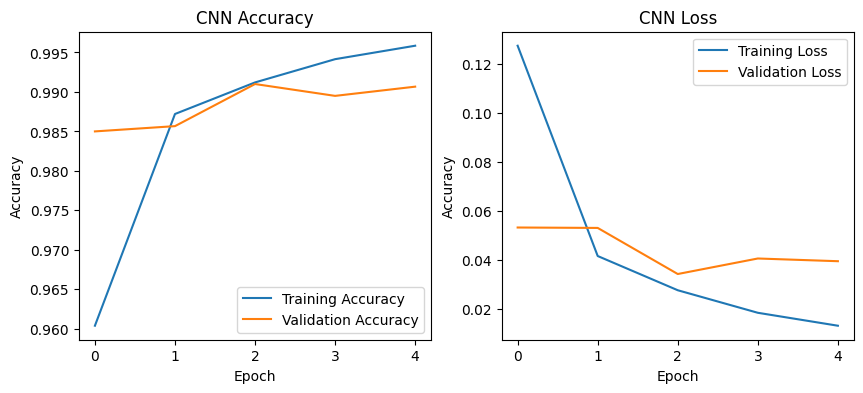

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnm = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnm = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  # tambahan lapisan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnm, y_train, epochs=5, validation_split=0.1)

# === Plot History ===

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)teks tebal

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.2569 - loss: 2.7991 - val_accuracy: 0.4874 - val_loss: 1.4043
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5085 - loss: 1.3601 - val_accuracy: 0.5644 - val_loss: 1.2339
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5800 - loss: 1.1818 - val_accuracy: 0.5762 - val_loss: 1.2063
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6222 - loss: 1.0730 - val_accuracy: 0.6140 - val_loss: 1.1021
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6526 - loss: 0.9969 - val_accuracy: 0.6088 - val_loss: 1.1187
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6789 - loss: 0.9130 - val_accuracy: 0.6538 - val_loss: 1.0063
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6911 - loss: 0.8822 - val_accuracy: 0.6310 - val_loss: 1.0621
Epoch 8/10
1407/1407 ━━

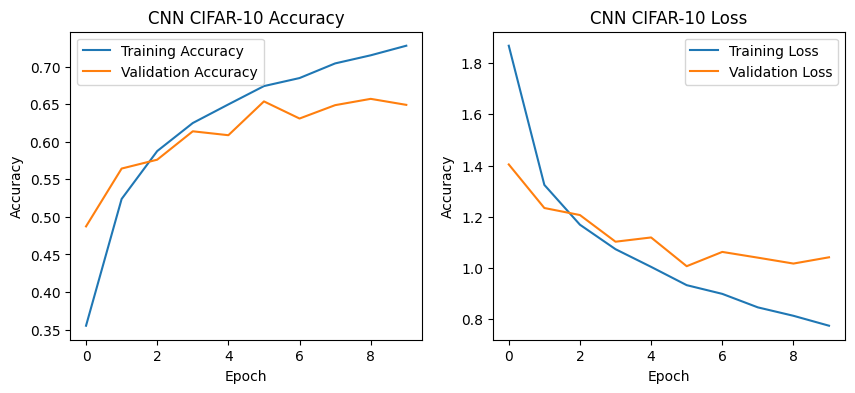

In [13]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_Train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],  label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tugas kecil: Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.1018 - loss: 3.4915 - val_accuracy: 0.0970 - val_loss: 2.3030
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.1002 - loss: 2.3029 - val_accuracy: 0.1024 - val_loss: 2.3029
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3030
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.0950 - val_loss: 2.3028
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.0976 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3031
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3029
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.0992 -

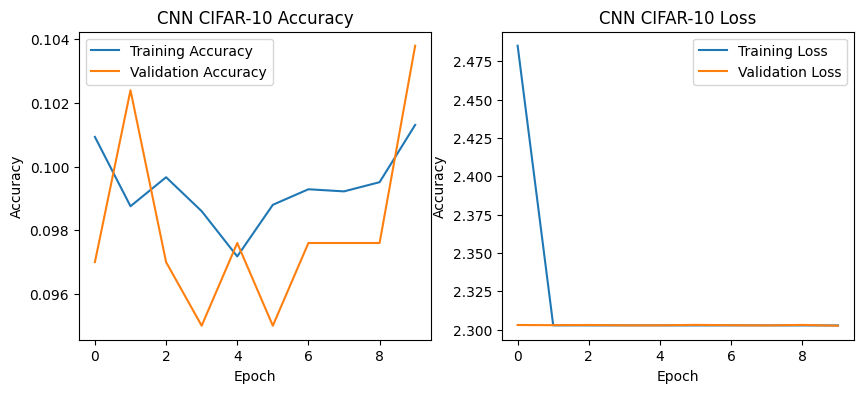

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_Train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],  label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 611s 433ms/step - accuracy: 0.3979 - loss: 4.3538 - val_accuracy: 0.5314 - val_loss: 1.3536
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 644s 448ms/step - accuracy: 0.5696 - loss: 1.2470 - val_accuracy: 0.5780 - val_loss: 1.2524
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 631s 449ms/step - accuracy: 0.6054 - loss: 1.1347 - val_accuracy: 0.5854 - val_loss: 1.2360
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 680s 447ms/step - accuracy: 0.6246 - loss: 1.0798 - val_accuracy: 0.5920 - val_loss: 1.2300
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 688s 451ms/step - accuracy: 0.6452 - loss: 1.0261 - val_accuracy: 0.5976 - val_loss: 1.2179


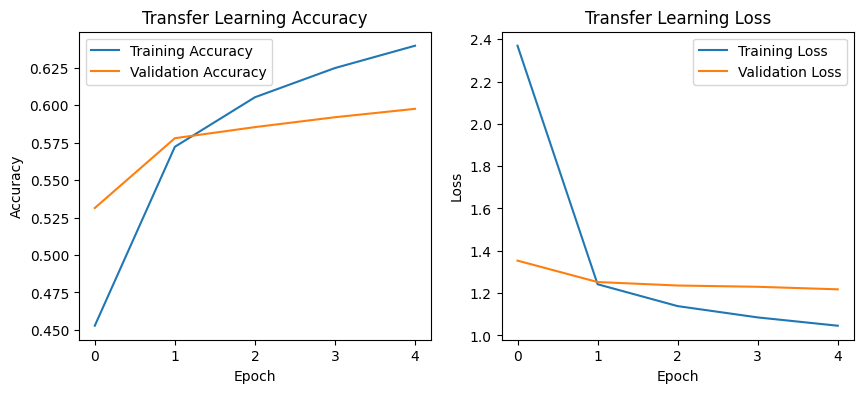

In [14]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 611s 433ms/step - accuracy: 0.5045 - loss: 1.4172 - val_accuracy: 0.6128 - val_loss: 1.0965
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 640s 455ms/step - accuracy: 0.6289 - loss: 1.0574 - val_accuracy: 0.6176 - val_loss: 1.0802
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 620s 441ms/step - accuracy: 0.6594 - loss: 0.9781 - val_accuracy: 0.6588 - val_loss: 0.9799
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 667s 473ms/step - accuracy: 0.6730 - loss: 0.9280 - val_accuracy: 0.6550 - val_loss: 0.9786
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 651s 462ms/step - accuracy: 0.6897 - loss: 0.8759 - val_accuracy: 0.6648 - val_loss: 0.9961


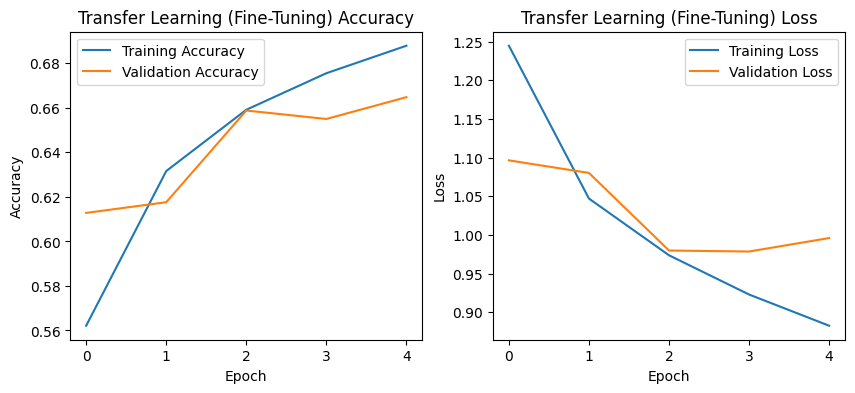

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# ==== Load dataset CIFAR-10 ====
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi ke [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# ==== Load base model VGG16 ====
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

# Bekukan dulu semua layer
base_model.trainable = False

# Lalu aktifkan 2 lapisan terakhir
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Buat model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Training ====
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning (Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning (Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 395ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       1.00      0.00      0.01      1000
           3       0.18      0.03      0.05      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.23      0.10      0.02     10000
weighted avg       0.23      0.10      0.02     10000



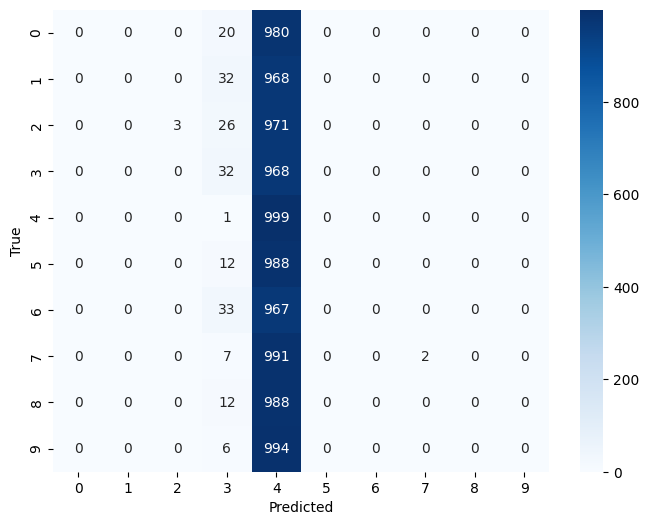

In [15]:
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

x_test_cifar = x_test_cifar.astype('float32') / 255.0

y_pred = model.predict(x_test_cifar).argmax(axis=1)

print(classification_report(y_test_cifar, y_pred))

cm = confusion_matrix(y_test_cifar, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Penugasan

Saving label_4.jpg to label_4.jpg


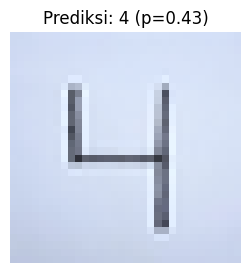

Rekap Prediksi (CNN):
label_4.jpg -> 4 (p=0.430)


In [19]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip CIFAR-10 (32x32, 3 channel) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_cifar10_32x32(img_pil):
    """
    Langkah:
    - Resize ke (32x32)
    - Konversi ke RGB (3 channel)
    - Normalisasi ke [0,1]
    """
    # Resize ke 32x32
    img = img_pil.resize((32, 32), Image.Resampling.LANCZOS)

    # Konversi ke RGB (3 channel)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0
    return arr, img


import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img = Image.open(fname)
    disp, x = preprocess_to_cifar10_32x32(img)  # disp: PIL untuk ditampilkan, x: (32, 32, 3)
    x_batch = np.expand_dims(x, axis=0)           #(1,32,32,3)
    probs = model.predict(x_batch, verbose=0)     # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp) # no cmap='gray' for RGB
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")

Saving label_7.jpg to label_7.jpg


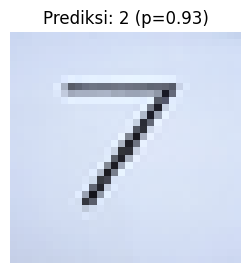

Rekap Prediksi (CNN):
label_7.jpg -> 2 (p=0.925)


In [20]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip CIFAR-10 (32x32, 3 channel) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_cifar10_32x32(img_pil):
    """
    Langkah:
    - Resize ke (32x32)
    - Konversi ke RGB (3 channel)
    - Normalisasi ke [0,1]
    """
    # Resize ke 32x32
    img = img_pil.resize((32, 32), Image.Resampling.LANCZOS)

    # Konversi ke RGB (3 channel)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0
    return arr, img


import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img = Image.open(fname)
    disp, x = preprocess_to_cifar10_32x32(img)  # disp: PIL untuk ditampilkan, x: (32, 32, 3)
    x_batch = np.expand_dims(x, axis=0)           #(1,32,32,3)
    probs = model.predict(x_batch, verbose=0)     # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp) # no cmap='gray' for RGB
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")

Saving label_3.jpg to label_3.jpg


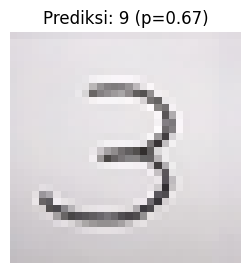

Rekap Prediksi (CNN):
label_3.jpg -> 9 (p=0.668)


In [21]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip CIFAR-10 (32x32, 3 channel) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_cifar10_32x32(img_pil):
    """
    Langkah:
    - Resize ke (32x32)
    - Konversi ke RGB (3 channel)
    - Normalisasi ke [0,1]
    """
    # Resize ke 32x32
    img = img_pil.resize((32, 32), Image.Resampling.LANCZOS)

    # Konversi ke RGB (3 channel)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0
    return arr, img


import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img = Image.open(fname)
    disp, x = preprocess_to_cifar10_32x32(img)  # disp: PIL untuk ditampilkan, x: (32, 32, 3)
    x_batch = np.expand_dims(x, axis=0)           #(1,32,32,3)
    probs = model.predict(x_batch, verbose=0)     # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp) # no cmap='gray' for RGB
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")

Saving label_1.jpg to label_1.jpg


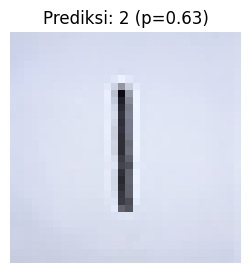

Rekap Prediksi (CNN):
label_1.jpg -> 2 (p=0.631)


In [22]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip CIFAR-10 (32x32, 3 channel) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_cifar10_32x32(img_pil):
    """
    Langkah:
    - Resize ke (32x32)
    - Konversi ke RGB (3 channel)
    - Normalisasi ke [0,1]
    """
    # Resize ke 32x32
    img = img_pil.resize((32, 32), Image.Resampling.LANCZOS)

    # Konversi ke RGB (3 channel)
    img = img.convert('RGB')

    # Normalisasi ke [0,1]
    arr = np.array(img).astype('float32') / 255.0
    return arr, img


import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img = Image.open(fname)
    disp, x = preprocess_to_cifar10_32x32(img)  # disp: PIL untuk ditampilkan, x: (32, 32, 3)
    x_batch = np.expand_dims(x, axis=0)           #(1,32,32,3)
    probs = model.predict(x_batch, verbose=0)     # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp) # no cmap='gray' for RGB
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")